 ## step1.ipynb

This notebook implements parts of the first step in the 5/28/18 plan.  
The first part of the plan (e.g. implementation of `double_sigma` units with sharpen ports) was tested in ../tests/test10.ipynb .

By `Sergio Verduzco`  
June 2018

### First part
Recreate the simulation in the __test 4__ section of test10.ipynb, this time using the ei_network framework.

__Proceed here directly after reset.__

The `sharpen` port will be 2, and the `rdc` port will be 0, where e,i inputs will arrive. Inputs arrive at port 1. 
Inputs to the sharpen port are set manually (without ei_net methods).


In [ ]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

In [ ]:
# create the network using the ei_network tools
layers = ['L', 'shrp']  # L is the layer, shrp is the extra input to the sharpen port
ei_net = ei_network(layers)

In [ ]:
# Configure layer parameters
L = ei_net.layers['L']
shrp = ei_net.layers['shrp']
#----------------------------------
L.set_param('e_pars', 'type', unit_types.sds_n_sharp)
L.set_param('e_pars', 'slope_min', 6.)
L.set_param('e_pars', 'slope_wid', .1)
L.set_param('e_pars', 'thresh_min', .3)
L.set_param('e_pars', 'thresh_wid', 0.1)
L.set_param('e_pars', 'n_ports', 4)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.5, 0.5], 'slopes' : 4, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 2.)
L.set_param('e_pars', 'tau_thr', .002)
L.set_param('e_pars', 'rdc_port', 1)
L.set_param('e_pars', 'thr_fix', 0.)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 3)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 8)
L.set_param('e_geom', 'columns', 8)
L.set_param('i_geom', 'rows', 4)
L.set_param('i_geom', 'columns', 4)
L.annotate("Compensating for the ratio of excitatory to inhibitory units.")
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1., 'high' : -.1}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 5) 
L.set_param('x_geom', 'columns', 5) 
L.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xe_conn', 'mask', {'circular': {'radius': .3}})
L.set_param('xi_conn', 'mask', {'circular': {'radius': .3}})
#-----------------------------------
# specifying input ports
L.set_param('ee_syn', 'inp_ports', 1) # ee should be at input 0 for trdc units
L.set_param('xe_syn', 'inp_ports', 2)
#L.set_param('xi_syn', 'inp_ports', 1)
L.set_param('ie_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using BCM EE synapses")
L.set_param('ee_syn', 'type', synapse_types.bcm)
L.set_param('ee_syn', 'lrate', 1./100.)
#L.set_param('ee_syn', 'omega', 2.)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./20.)
L.set_param('ie_syn', 'des_act', 0.4)
#----------------------------------
L.annotate("Using anti_cov_pre EI synapses")
L.set_param('ei_syn', 'type', synapse_types.anticov_pre)
L.set_param('ei_syn', 'lrate', .02)
#----------------------------------
shrp.annotate("Leaving a single input unit in the layer")
shrp.set_param('e_geom', 'rows', 0)
shrp.set_param('i_geom', 'rows', 0)
shrp.set_param('x_geom', 'rows', 1)
shrp.set_param('x_geom', 'columns', 1)
#----------------------------------
shrp.annotate("Configuring sharpening unit")
shrp.set_param('x_pars', 'function', lambda x : None)
shrp.set_param('x_pars', 'init_val', 1.)
shrp.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
L.set_param('n', 'w_track', 16)
shrp.set_param('n', 'w_track', 0)
#----------------------------------

In [ ]:
# Add interlayer connections
ei_net.add_connection(('shrp','x'), ('L','e'))

In [ ]:
# Configure interlayer connections
ei_net.set_param('shrpx_Le_conn', 'mask',{'circular': {'radius': 10.}})
ei_net.set_param('shrpx_Le_conn', 'kernel', 1.)
ei_net.set_param('shrpx_Le_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
ei_net.set_param('shrpx_Le_syn', 'init_w', 1.)
ei_net.set_param('shrpx_Le_syn', 'inp_ports', L.e_pars['sharpen_port'])

In [ ]:
# Build the network
ei_net.build()

In [ ]:
# Creating input patterns
## The patterns of L.x
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, port=0, random=False):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]

## The pattern of shrp.x is irrelevant, we set it using the set_inp_fun argument
shrp_inp_pat = lambda p, r, c : 1.


def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'L' : inp_pat, 'shrp' : shrp_inp_pat}
inp_fun_dic = {'shrp' : set_shrp_fun }

In [ ]:
# Simulating
n_pres = 8
pres_time = 2.
    
ei_net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

In [ ]:
%matplotlib inline
ei_net.basic_plot('L')

In [ ]:
%matplotlib inline
ei_net.basic_plot('shrp')

In [ ]:
ei_net.double_anim(L.e, slider=False, interv=20, nbins=20, thr=0.5, pdf=True)

In [ ]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 5  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 10  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [ ]:
ei_net.hist_anim(L.e)

### Second part
Represent combinations of 2 localized 1D layers using the middle layer. 

Test representations using the angle of the activity vectors. At the end of the presentation, when the layer activity has settled, you take the activity vector of the middle layer.
* Activity vectors with the same input pattern should have small angles, and the std. dev. of the angles around the mean should be small.
* Activity vectors from different inputs should have larger angles, e.g. their normalized inner products should be small.

__Proceed here directly after reset.__



In [1]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

/home/z/projects/draculab


In [ ]:
# This is the name of the file where logging will happen
log_file = "./logs/step1p2" + time.strftime("_%m-%d-%y.txt")

In [ ]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [ ]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [2]:
# create the network using the ei_network tools
layers = ['L', 'shrp','I1', 'I2']  # L is the layer, shrp is the extra input to the sharpen port, I1,2 are the input layers
ei_net = ei_network(layers)

In [3]:
# Configure layer parameters

ei_net.annotate('Configuration for sds_n_ssrdc_sharp in L.e')
L = ei_net.layers['L']
shrp = ei_net.layers['shrp']
I1 = ei_net.layers['I1']
I2 = ei_net.layers['I2']

#----------------------------------
L.annotate("Configuration of units in layer L.")
L.set_param('e_pars', 'type', unit_types.sds_n_ssrdc_sharp)
L.set_param('e_pars', 'slope_min', 1.7)
L.set_param('e_pars', 'slope_wid', .5)
L.set_param('e_pars', 'thresh_min', 0.)
L.set_param('e_pars', 'thresh_wid', 0.5)
L.set_param('e_pars', 'tau_min', 0.1)
L.set_param('e_pars', 'tau_wid', 0.3)
L.set_param('e_pars', 'n_ports', 4)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.3, 0.7], 'slopes' : 3, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 3.)
L.set_param('e_pars', 'tau_scale', .01)
L.set_param('e_pars', 'tau_relax', 5.)
L.set_param('e_pars', 'Kp', .02)
L.set_param('e_pars', 'tau_thr', .01)
L.set_param('e_pars', 'rdc_port', 1)
L.set_param('e_pars', 'hr_port', 0)
L.set_param('e_pars', 'thr_fix', 0.1)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 3)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 10)
L.set_param('e_geom', 'columns', 10)
L.set_param('i_geom', 'rows', 5)
L.set_param('i_geom', 'columns', 5)
L.set_param('e_geom', 'jitter', 0.)
L.set_param('i_geom', 'jitter', 0.)
L.annotate("Compensating for the ratio of excitatory to inhibitory units.")
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -.2}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})

#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 0) # no input units in layer L
#-----------------------------------
# specifying local input ports
L.set_param('ee_syn', 'inp_ports', 1)
L.set_param('ie_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using sq_hebbsnorm EE synapses")
L.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
L.set_param('ee_syn', 'lrate', 1./100.)
L.set_param('ee_syn', 'omega', 1.8)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./20.)
L.set_param('ie_syn', 'des_act', 0.3)
#----------------------------------
L.annotate("Using static EI synapses")
L.set_param('ei_syn', 'type', synapse_types.static)
#----------------------------------
shrp.annotate("Leaving no units in the shrp layer")
shrp.set_param('e_geom', 'rows', 0)
shrp.set_param('i_geom', 'rows', 0)
shrp.set_param('x_geom', 'rows', 0)
#----------------------------------
shrp.annotate("Configuring sharpening unit")
shrp.set_param('x_pars', 'function', lambda x : None)
shrp.set_param('x_pars', 'init_val', 1.)
shrp.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
I1.annotate("Configuration of I1 geometry")
I1.set_param('e_geom', 'rows', 0)
I1.set_param('i_geom', 'rows', 0)
I1.set_param('x_geom', 'rows', 10)
I1.set_param('x_geom', 'columns', 1)
I1.set_param('x_geom', 'extent', [.5, 1.])
I1.set_param('x_geom', 'center', [-.7, 0.])
#----------------------------------
I2.annotate("Configuration of I2 geometry")
I2.set_param('e_geom', 'rows', 0)
I2.set_param('i_geom', 'rows', 0)
I2.set_param('x_geom', 'rows', 1)
I2.set_param('x_geom', 'columns', 10)
I2.set_param('x_geom', 'extent', [1., .5])
I2.set_param('x_geom', 'center', [0., .7])
#----------------------------------
L.set_param('n', 'w_track', 16)
shrp.set_param('n', 'w_track', 0)
I1.set_param('n', 'w_track', 0)
I2.set_param('n', 'w_track', 0)
#----------------------------------

In [4]:
# Add interlayer connections
"""ei_net.add_connection(('shrp','x'), ('L','e'))"""
ei_net.add_connection(('I1','x'), ('L','e'))
ei_net.add_connection(('I1','x'), ('L','i'))
ei_net.add_connection(('I2','x'), ('L','e'))
ei_net.add_connection(('I2','x'), ('L','i'))

In [5]:
# Configure interlayer connections
"""
ei_net.set_param('shrpx_Le_conn', 'mask',{'circular': {'radius': 10.}})
ei_net.set_param('shrpx_Le_conn', 'kernel', 1.)
ei_net.set_param('shrpx_Le_conn', 'weights', {'uniform' : {'low': 0., 'high': 0.}})
ei_net.set_param('shrpx_Le_syn', 'init_w', 0.)
ei_net.set_param('shrpx_Le_syn', 'inp_ports', L.e_pars['sharpen_port'])
"""
ei_net.set_param('I1x_Le_conn', 'connection_type', 'convergent')
ei_net.set_param('I1x_Le_conn', 'number_of_connections', 2)
ei_net.set_param('I1x_Le_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I1x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I1x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
ei_net.set_param('I1x_Le_conn', 'dist_dim', 'y')
ei_net.set_param('I1x_Le_conn', 'edge_wrap', False)
ei_net.set_param('I1x_Le_syn', 'inp_ports', 2)
ei_net.set_param('I1x_Le_syn', 'type', synapse_types.bcm)
ei_net.set_param('I1x_Le_syn', 'lrate', 1./50.)
ei_net.set_param('I1x_Le_syn', 'omega', 1.5)

ei_net.set_param('I1x_Li_conn', 'connection_type', 'convergent')
ei_net.set_param('I1x_Li_conn', 'number_of_connections', 2)
ei_net.set_param('I1x_Li_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I1x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I1x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
ei_net.set_param('I1x_Li_conn', 'dist_dim', 'y')
ei_net.set_param('I1x_Li_conn', 'edge_wrap', False)

ei_net.set_param('I2x_Le_conn', 'connection_type', 'convergent')
ei_net.set_param('I2x_Le_conn', 'number_of_connections', 2)
ei_net.set_param('I2x_Le_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I2x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I2x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
ei_net.set_param('I2x_Le_conn', 'dist_dim', 'x')
ei_net.set_param('I2x_Le_syn', 'inp_ports', 2)
ei_net.set_param('I2x_Le_syn', 'type', synapse_types.bcm)
ei_net.set_param('I2x_Le_syn', 'lrate', 1./50.)
ei_net.set_param('I2x_Le_syn', 'omega', 1.5)

ei_net.set_param('I2x_Li_conn', 'connection_type', 'convergent')
ei_net.set_param('I2x_Li_conn', 'number_of_connections', 2)
ei_net.set_param('I2x_Li_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I2x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I2x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
ei_net.set_param('I2x_Li_conn', 'dist_dim', 'x')
ei_net.set_param('I2x_Li_conn', 'edge_wrap', False)


In [6]:
# Build the network
ei_net.build()

Building layer shrp
Building layer L


/home/z/projects/draculab/topology.py:286: UserWarning: topo_connect received an empty list as an argument
  warn('topo_connect received an empty list as an argument', UserWarning)


Building layer I2
Building layer I1


Creating I1x_Le connection
Creating I1x_Li connection
Creating I2x_Le connection
Creating I2x_Li connection


In [7]:
#================ INPUT CONFIGURATION =================
n_pat1 = I1.n['x']  # number of input patterns for I1 is number of input units
n_pat2 = I2.n['x']  # number of input patterns for I2 is number of input units
pats1 = [] # here we'll store id's for the patterns presented by inp_pat1
pats2 = [] # here we'll store id's for the patterns presented by inp_pat2
i_nums = np.random.permutation(n_pat1*n_pat2)
idx_list1 = [int(np.floor(n/n_pat2)) for n in i_nums]
idx_list2 = [int(round(n%n_pat2)) for n in i_nums]

def inp_pat1(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I1
    if random:
        if pres < 930:
            idx = np.random.randint(n_pat1)
        else:
            idx = idx_list1[pres%len(idx_list1)]
    else:
        idx = pres % n_pat1
    pats1.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat1)) for x in range(n_pat1)]
    
def inp_pat2(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I2
    if random:
        if pres < 930:
            idx = np.random.randint(n_pat2)
        else:
            idx = idx_list2[pres%len(idx_list2)]
    else:
        idx = pres % n_pat2
    pats2.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat2)) for x in range(n_pat2)]
    
## The pattern of shrp.x is irrelevant, we set it using the set_inp_fun argument
shrp_inp_pat = lambda p, r, c : 1.

def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'I1' : inp_pat1, 'I2' : inp_pat2, 'shrp' : shrp_inp_pat}
inp_fun_dic = {'shrp' : set_shrp_fun }
#======================================================


In [8]:
%%capture capt2
# The cell above does input configuration, and this should capture it in 'capt2'
%history -l 1

In [ ]:
# Write the input configuration two cells above in the simulation log
f = open(log_file, mode='a')
f.write(capt2.stdout)
f.close()

In [9]:
# Simulating
n_pres = 5
pres_time = 1.
    
ei_net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

Starting presentation 0


/home/z/projects/draculab/units.py:3148: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-slope*(arg - thresh)))


Presentation 0 took 16.08091425895691 seconds 
Starting presentation 1
Presentation 1 took 15.601225852966309 seconds 
Starting presentation 2
Presentation 2 took 15.904745817184448 seconds 
Starting presentation 3
Presentation 3 took 15.856797695159912 seconds 
Starting presentation 4
Presentation 4 took 15.485154390335083 seconds 
Total execution time is 78.93079853057861 seconds 
----------------------


In [ ]:
# Simulation analysis

## For each input presentation obtain the activity vector from layer L
ppat = int(round(pres_time/ei_net.net_params['min_delay'])) # number of data points per input pattern
pt = int(round((pres_time-0.2)/ei_net.net_params['min_delay'])) # data point where the vector will come from
e_pats = np.zeros((len(L.e), n_pres))  # array where we'll store the activity vectors
for pres in range(n_pres):
    for e_idx, idx in enumerate(L.e):
        e_pats[e_idx, pres] = ei_net.all_activs[idx, pres*ppat + pt]

# The ID of the input comes from the id's in pats1 and pats2, placed by inp_pat1 and inp_pat2 respectively.
pater1 = pats1[1:] # The first call is just for setting initial conditions; we discard its pattern
pater2 = pats2[1:] # ditto
pats = np.zeros(n_pat1*n_pat2)  # pats[n] is the number of times the pattern with ID 'n' appeared
n_pats = len(pats)
pres_pat = np.zeros(n_pres)  # pres_pat[n] is the ID of the pattern in presentation 'n'
for p in range(n_pres):
    p_id = n_pat2*pater1[p] + pater2[p] # the pattern ID 'flattens' all possible pairs of values
    pats[p_id] += 1
    pres_pat[p] = p_id


# get the mean of output patterns corresponding to the same inputs
mean_out = np.zeros((len(L.e),n_pats)) # mean_out[:,n] = mean output for input n
for pres in range(n_pres):
    mean_out[:,int(pres_pat[pres])] += e_pats[:,pres]
    
for pat in range(n_pats):
    if pats[pat] > 1:
        mean_out[:, pat] = mean_out[:, pat]/ pats[pat]
        
# Obtain the angles between any two pairs of input patterns
# get all input patterns
all_inps = np.zeros((n_pats, n_pat1+n_pat2)) # all_inps[n,:] = input pattern with ID 'n'
for p1 in range(n_pat1):
    for p2 in range(n_pat2):
        all_inps[p1*n_pat2+p2, :n_pat1] = inp_pat1(p1, 1, 1, random=False)
        all_inps[p1*n_pat2+p2, n_pat1:] = inp_pat2(p2, 1, 1, random=False)
        

# get matrices with dot products between pairs of patterns
inp_norm = np.linalg.norm(all_inps[0,:])   # all input vectors have the same norm
inp_norm2 = inp_norm*inp_norm
inp_dots = np.zeros((n_pats, n_pats))
out_dots = np.zeros((n_pats, n_pats))
for p1 in range(n_pats):
    for p2 in range(n_pats):
        inp_dots[p1,p2] = np.dot(all_inps[p1,:], all_inps[p2,:])/inp_norm2
        if pats[p1] > 0 and pats[p2] > 0: # if the two input patterns were presented
                #pres_idx1 = np.argmin(abs(pres_pat - p1))  # index of presentation where you showed pattern 1
                #pres_idx2 = np.argmin(abs(pres_pat - p2))  # index of presentation where you showed pattern 2
                #vec1 = e_pats[:,pres_idx1]  # first input vector
                #vec2 = e_pats[:,pres_idx2]  # second input vector
                vec1 = mean_out[:,p1]
                vec2 = mean_out[:,p2]
                norm1 = np.linalg.norm(vec1)
                norm2 = np.linalg.norm(vec2)
                out_dots[p1,p2] = np.dot(vec1,vec2)/(norm1*norm2)

                
# compare the angles between input patterns with the angles between output patterns
absissae = []
ordinates = []
for row in range(n_pats):
    for column in range(n_pats):
        if out_dots[row,column] > 0:
            absissae.append(inp_dots[row,column])
            ordinates.append(out_dots[row,column])
            
#plot the results of the analysis
%matplotlib inline
fig, axes = plt.subplots(2,2, figsize=(21, 23))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

im0 = axes[0,0].plot(absissae, ordinates, '.')
axes[0,0].set_title('inp_dots vs out_dots')
im1 = axes[0,1].imshow(mean_out)
axes[0,1].set_title('mean output for each input pattern')
fig.colorbar(im1,ax=axes[0,1],fraction=0.1,shrink=0.8)
im2 = axes[1,0].imshow(inp_dots)
axes[1,0].set_title('dot products between input vectors')
im3 = axes[1,1].imshow(out_dots)
axes[1,1].set_title('dot products between mean output vectors')
#fig.colorbar(im3,fraction=0.1,shrink=0.8)

# plot the array of activity patterns
ex_fig = plt.figure(figsize=(20,10))
plt.imshow(e_pats)
    
# A numerical measure of how much the output representation differentiates the inputs may be the norm of (inp_dots - out_dots)
diff_norm = np.linalg.norm(inp_dots-out_dots) # will use Frobenius norm, as if they were vectors
print("norm of output matrix: %f" % (np.linalg.norm(out_dots)))
print("norm of input matrix: %f" % (np.linalg.norm(inp_dots)))
print("norm of difference between matrices: %f" % (diff_norm))

In [ ]:
%%capture capt3
# The cell above does output analysis, and this can capture it in 'capt3'
%history -l 1

In [ ]:
# Write the analysis code two cells above in the simulation log
f = open(log_file, mode='a')
f.write(capt3.stdout)
f.close()

In [ ]:
# plot the array of activity patterns, or difference matrix
%matplotlib inline
ex_fig = plt.figure(figsize=(20,20))
#plt.imshow(e_pats[:,:100])
plt.imshow(inp_dots-out_dots)
plt.colorbar()

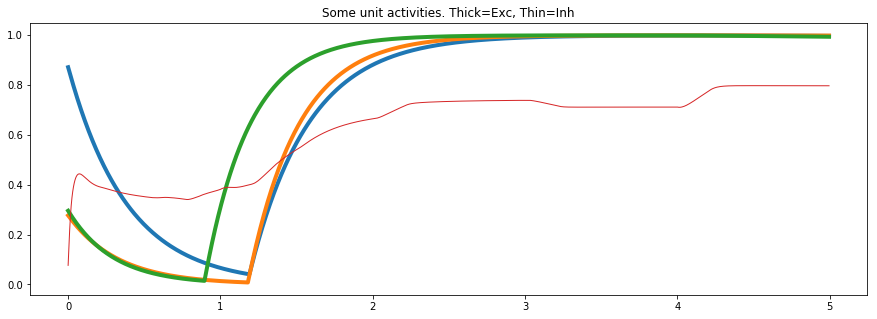

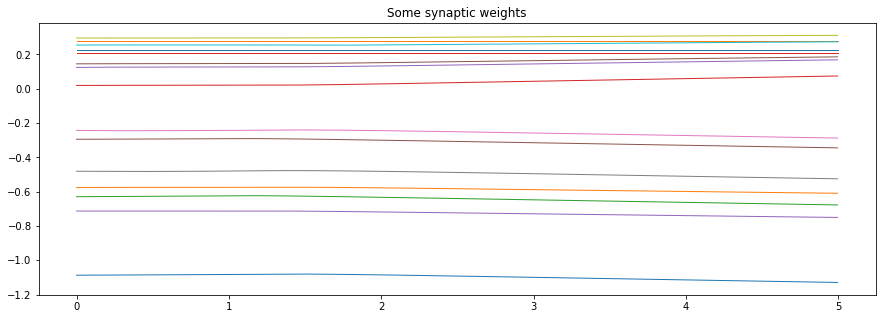

In [9]:
%matplotlib inline
ei_net.basic_plot('L')

In [ ]:
%matplotlib inline
ei_net.basic_plot('shrp')

In [11]:
ei_net.double_anim(L.e+I1.x+I2.x, slider=False, interv=20, nbins=20, thr=0.7, pdf=True)

In [ ]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 2  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 6  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [ ]:
# Visualize the connections
ei_net.conn_anim(I1.x+I2.x, L.e, slider=True)
#ei_net.conn_anim(L.e, L.e, slider=True)

In [ ]:
# Annotations and log
ei_net.annotate("This simulation takes the parameters used for the sigmoidal in the previous simulation, and uses them")
ei_net.annotate("for sig_trdc units. The network is probably better than anything I found with sigmoidals, (norm of ")
ei_net.annotate("difference matrices is around 6), but the")
ei_net.annotate("rate distributions that eventually settle in (after 200 or so presentations) are not exponential; they")
ei_net.annotate("are bimodal, with all rates concentrated around 0 or 1 (U shaped). This may be related to the")
ei_net.annotate("inconsistently high desired value of the homeostatic inhibition, and also it should be related to the")
ei_net.annotate("propensity of EE connections and BCM inputs to form activity clusters.")
#ei_net.annotate("stop growing.", make_history=False)
ei_net.log(name=log_file,params=False)

In [ ]:
ei_net.save('step1p2_sig_trdc1.pkl')

### Third part
Add a third input layer whose activity is driven by function of the first two, and that has reciprocal connections with the representation layer.

__Proceed here directly after reset.__

In [1]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

/home/z/projects/draculab


In [ ]:
# This is the name of the file where logging will happen
log_file = "./logs/step1p2" + time.strftime("_%m-%d-%y.txt")

In [ ]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [ ]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [2]:
# create the network using the ei_network tools
layers = ['L','I1', 'I2', 'I3', 'LI3']  
# L is the representatioan layer, I1,2,3 are the source layers, LI3 is the bidirectionally connected input layer
net = ei_network(layers)

In [3]:
# Configure layer parameters

net.annotate('Configuration for sig_trdc in L.e')
L = net.layers['L']
I1 = net.layers['I1']
I2 = net.layers['I2']
I3 = net.layers['I3']
LI3 = net.layers['LI3']
#----------------------------------
L.annotate("Configuration of units in layer L.")
L.set_param('e_pars', 'type', unit_types.sig_trdc)
L.set_param('e_pars', 'slope_min', 1.7)
L.set_param('e_pars', 'slope_wid', .5)
L.set_param('e_pars', 'thresh_min', 0.)
L.set_param('e_pars', 'thresh_wid', 0.5)
L.set_param('e_pars', 'tau_min', 0.1)
L.set_param('e_pars', 'tau_wid', 0.3)
L.set_param('e_pars', 'n_ports', 2)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.3, 0.7], 'slopes' : 3, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 3.)
L.set_param('e_pars', 'tau_scale', .008)
L.set_param('e_pars', 'tau_relax', 10.)
L.set_param('e_pars', 'Kp', .02)
L.set_param('e_pars', 'tau_thr', .01)
L.set_param('e_pars', 'rdc_port', 0)
L.set_param('e_pars', 'hr_port', 0)
L.set_param('e_pars', 'thr_fix', 0.1)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 2)
#----------------------------------
L.annotate("Adjusting size of e,i groups, and connection weights.")
L.set_param('e_geom', 'rows', 10)
L.set_param('e_geom', 'columns', 10)
L.set_param('i_geom', 'rows', 5)
L.set_param('i_geom', 'columns', 5)
L.set_param('e_geom', 'jitter', 0.)
L.set_param('i_geom', 'jitter', 0.)
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -.2}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
L.annotate("Setting local inputs for L")
L.set_param('x_geom', 'rows', 0) # one or zero inputs in L, depending on sharpening
L.set_param('x_geom', 'columns', 1)
L.set_param('xe_conn', 'mask', {'circular': {'radius': 100.}}) # projecting to all L.e units
L.set_param('xe_conn', 'kernel', 1.)
L.set_param('xe_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
L.set_param('xe_syn', 'inp_ports', L.e_pars['sharpen_port'])
L.set_param('x_pars', 'tau_fast', 0.05)
#-----------------------------------
# specifying local input ports
L.set_param('ee_syn', 'inp_ports', 0)
L.set_param('ie_syn', 'inp_ports', 1)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using sq_hebbsnorm EE synapses")
L.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
L.set_param('ee_syn', 'lrate', 1./100.)
L.set_param('ee_syn', 'omega', 1.5)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./40.)
L.set_param('ie_syn', 'des_act', 0.4)
#----------------------------------
L.annotate("Using static EI synapses")
L.set_param('ei_syn', 'type', synapse_types.static)
#----------------------------------
I1.annotate("Configuration of I1 geometry")
I1.set_param('e_geom', 'rows', 0)
I1.set_param('i_geom', 'rows', 0)
I1.set_param('x_geom', 'rows', 10)
I1.set_param('x_geom', 'columns', 1)
I1.set_param('x_geom', 'extent', [.5, 1.])
I1.set_param('x_geom', 'center', [-.7, 0.])
#----------------------------------
I2.annotate("Configuration of I2 geometry")
I2.set_param('e_geom', 'rows', 0)
I2.set_param('i_geom', 'rows', 0)
I2.set_param('x_geom', 'rows', 1)
I2.set_param('x_geom', 'columns', 10)
I2.set_param('x_geom', 'extent', [1., .5])
I2.set_param('x_geom', 'center', [0., .7])
#----------------------------------
I3.annotate("Configuration of I3 geometry")
I3.set_param('e_geom', 'rows', 0)
I3.set_param('i_geom', 'rows', 0)
I3.set_param('x_geom', 'rows', 1)
I3.set_param('x_geom', 'columns', 10)
I3.set_param('x_geom', 'extent', [1., .5])
I3.set_param('x_geom', 'center', [0., -.9])
#----------------------------------
L.set_param('n', 'w_track', 16)
LI3.set_param('n', 'w_track', 8)
I1.set_param('n', 'w_track', 0)
I2.set_param('n', 'w_track', 0)
I3.set_param('n', 'w_track', 0)
#----------------------------------

In [4]:
# Layer LI3 parameters
#----------------------------------
LI3.annotate("Configuration of units in layer LI3.")
LI3.set_param('e_pars', 'type', unit_types.sig_trdc)
LI3.set_param('e_pars', 'slope_min', 1.9)
LI3.set_param('e_pars', 'slope_wid', .2)
LI3.set_param('e_pars', 'thresh_min', 0.2)
LI3.set_param('e_pars', 'thresh_wid', 0.5)
LI3.set_param('e_pars', 'tau_min', 0.1)
LI3.set_param('e_pars', 'tau_wid', 0.3)
LI3.set_param('e_pars', 'n_ports', 2)
LI3.set_param('e_pars', 'branch_params', {'branch_w' : [0.3, 0.7], 'slopes' : 3, 'threshs' : 0.1})
LI3.set_param('e_pars', 'tau_slow', 10.)
LI3.set_param('e_pars', 'tau_fast', 0.05)
LI3.set_param('e_pars', 'c', 2.)
LI3.set_param('e_pars', 'tau_scale', .05)
LI3.set_param('e_pars', 'tau_relax', 10.)
LI3.set_param('e_pars', 'Kp', .02)
LI3.set_param('e_pars', 'tau_thr', .01)
LI3.set_param('e_pars', 'rdc_port', 0)
LI3.set_param('e_pars', 'hr_port', 0)
LI3.set_param('e_pars', 'thr_fix', 0.1)
LI3.set_param('e_pars', 'tau_fix', 0.1)
LI3.set_param('e_pars', 'sharpen_port', 2)
#----------------------------------
LI3.annotate("Adjusting e,i groups, and configuring EI,IE connections")
LI3.set_param('e_geom', 'rows', 1)
LI3.set_param('e_geom', 'columns', 10)
LI3.set_param('i_geom', 'rows', 1)
LI3.set_param('i_geom', 'columns', 5)
LI3.set_param('e_geom', 'jitter', 0.)
LI3.set_param('i_geom', 'jitter', 0.)
LI3.set_param('e_geom', 'extent', [1., .5])
LI3.set_param('e_geom', 'center', [0., -.7])
LI3.set_param('i_geom', 'extent', [1., .5])
LI3.set_param('i_geom', 'center', [0., -.7])
LI3.set_param('x_geom', 'extent', [1., .5])
LI3.set_param('x_geom', 'center', [0., -.7])

LI3.set_param('ee_conn', 'mask', {'circular' : {'radius': 3.}})
LI3.set_param('ee_conn', 'kernel', {'gaussian' : {'p_center' : 1.1, 'sigma' : .5}})
LI3.set_param('ee_conn', 'allow_autapses', True)
LI3.set_param('ee_conn', 'weights', {'gaussian' : {'w_center' : .5, 'sigma' : .2}})

LI3.set_param('ei_conn', 'mask', {'annular' : {'inner_radius': .2, 'outer_radius' : 0.5}})
LI3.set_param('ei_conn', 'kernel', 1.)
LI3.set_param('ei_conn', 'weights',{'ring_gaussian' : {'w_center' : .8, 'sigma' : .2, 'radius' : .3}})

LI3.set_param('ie_conn', 'mask', {'circular' : {'radius': 3.}})
LI3.set_param('ie_conn', 'kernel', {'gaussian' : {'p_center' : 1., 'sigma' : 2.}})
LI3.set_param('ie_conn', 'allow_autapses', True)
LI3.set_param('ie_conn', 'weights', {'gaussian' : {'w_center' : -.8, 'sigma' : .5}})

LI3.set_param('ii_conn', 'weights',{'uniform' : {'low': -.5, 'high' : -0.2}})
#----------------------------------
LI3.annotate("Setting LI3.x configuration")
LI3.set_param('x_geom', 'rows', 0) # one or zero inputs in L, depending on sharpening
LI3.set_param('x_geom', 'columns', 1)
LI3.set_param('xe_conn', 'mask', {'circular': {'radius': 100.}}) # projecting to all LI3.e units
LI3.set_param('xe_conn', 'kernel', 1.)
LI3.set_param('xe_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
LI3.set_param('xe_syn', 'inp_ports', L.e_pars['sharpen_port'])
#-----------------------------------
# specifying local input ports
LI3.set_param('ee_syn', 'inp_ports', 0)
LI3.set_param('ie_syn', 'inp_ports', 1)
#----------------------------------
LI3.annotate("Using static input synapses")
LI3.set_param('xe_syn', 'type', synapse_types.static)
LI3.set_param('xi_syn', 'type', synapse_types.static)
#----------------------------------
LI3.annotate("Using sq_hebbsnorm EE synapses")
LI3.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
LI3.set_param('ee_syn', 'lrate', 1./100.)
LI3.set_param('ee_syn', 'omega', 1.8)
#----------------------------------
LI3.annotate("Using static IE synapses")
LI3.set_param('ie_syn', 'type', synapse_types.static)
#----------------------------------
LI3.annotate("Using anticov EI synapses")
LI3.set_param('ei_syn', 'type', synapse_types.anticov)
LI3.set_param('ei_syn', 'lrate', 1./500.)

In [5]:
# Add interlayer connections
net.add_connection(('I1','x'), ('L','e'))
net.add_connection(('I1','x'), ('L','i'))
net.add_connection(('I2','x'), ('L','e'))
net.add_connection(('I2','x'), ('L','i'))
net.add_connection(('I3','x'), ('LI3','e'))
net.add_connection(('I3','x'), ('LI3','i'))
net.add_connection(('LI3','e'), ('L','e'))
net.add_connection(('LI3','e'), ('L','i'))
net.add_connection(('L','e'), ('LI3','e'))

In [6]:
# Configure interlayer connections

net.set_param('I1x_Le_conn', 'connection_type', 'convergent')
net.set_param('I1x_Le_conn', 'number_of_connections', 2)
net.set_param('I1x_Le_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I1x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I1x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
net.set_param('I1x_Le_conn', 'dist_dim', 'y')
net.set_param('I1x_Le_conn', 'edge_wrap', True)
net.set_param('I1x_Le_syn', 'inp_ports', 1)
net.set_param('I1x_Le_syn', 'type', synapse_types.bcm)
net.set_param('I1x_Le_syn', 'lrate', 1./50.)
net.set_param('I1x_Le_syn', 'omega', 1.5)

net.set_param('I1x_Li_conn', 'connection_type', 'convergent')
net.set_param('I1x_Li_conn', 'number_of_connections', 2)
net.set_param('I1x_Li_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I1x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I1x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
net.set_param('I1x_Li_conn', 'dist_dim', 'y')
net.set_param('I1x_Li_conn', 'edge_wrap', True)

net.set_param('I2x_Le_conn', 'connection_type', 'convergent')
net.set_param('I2x_Le_conn', 'number_of_connections', 2)
net.set_param('I2x_Le_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I2x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I2x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
net.set_param('I2x_Le_conn', 'dist_dim', 'x')
net.set_param('I2x_Le_conn', 'edge_wrap', True)
net.set_param('I2x_Le_syn', 'inp_ports', 1)
net.set_param('I2x_Le_syn', 'type', synapse_types.bcm)
net.set_param('I2x_Le_syn', 'lrate', 1./50.)
net.set_param('I2x_Le_syn', 'omega', 1.5)

net.set_param('I2x_Li_conn', 'connection_type', 'convergent')
net.set_param('I2x_Li_conn', 'number_of_connections', 2)
net.set_param('I2x_Li_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I2x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I2x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
net.set_param('I2x_Li_conn', 'dist_dim', 'x')
net.set_param('I2x_Li_conn', 'edge_wrap', True)

net.set_param('I3x_LI3e_conn', 'mask', {'circular': {'radius': .2}})
net.set_param('I3x_LI3e_conn', 'kernel', 1.)
net.set_param('I3x_LI3e_conn', 'weights', {'gaussian' : {'w_center' : 1.6, 'sigma' : .2}})
net.set_param('I3x_LI3e_conn', 'dist_dim', 'x')
net.set_param('I3x_LI3e_conn', 'edge_wrap', True)
net.set_param('I3x_LI3e_syn', 'inp_ports', 1)
net.set_param('I3x_LI3e_syn', 'type', synapse_types.static)

net.set_param('I3x_LI3i_conn', 'mask', {'annular' : {'inner_radius': .1, 'outer_radius' : 0.5}})
net.set_param('I3x_LI3i_conn', 'kernel', 1.)
net.set_param('I3x_LI3i_conn', 'weights', {'ring_gaussian' : {'w_center' : .4, 'sigma' : .3, 'radius' : .2}})
net.set_param('I3x_LI3i_conn', 'dist_dim', 'x')
net.set_param('I3x_LI3i_conn', 'edge_wrap', True)

net.set_param('LI3e_Le_conn', 'connection_type', 'convergent')
net.set_param('LI3e_Le_conn', 'number_of_connections', 2)
net.set_param('LI3e_Le_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('LI3e_Le_conn', 'kernel', .4)
net.set_param('LI3e_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
net.set_param('LI3e_Le_conn', 'edge_wrap', True)
net.set_param('LI3e_Le_syn', 'inp_ports', 1)
net.set_param('LI3e_Le_syn', 'type', synapse_types.bcm)
net.set_param('LI3e_Le_syn', 'lrate', 1./50.)
net.set_param('LI3e_Le_syn', 'omega', 1.5)

net.set_param('LI3e_Li_conn', 'connection_type', 'convergent')
net.set_param('LI3e_Li_conn', 'number_of_connections', 2)
net.set_param('LI3e_Li_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('LI3e_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('LI3e_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .5}})
net.set_param('LI3e_Li_conn', 'dist_dim', 'x')
net.set_param('LI3e_Li_conn', 'edge_wrap', True)

net.set_param('Le_LI3e_conn', 'connection_type', 'divergent')
net.set_param('Le_LI3e_conn', 'number_of_connections', 6)
net.set_param('Le_LI3e_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('Le_LI3e_conn', 'kernel', 1.)
net.set_param('Le_LI3e_conn', 'weights', {'uniform' : {'low' : 0.01, 'high' : .02}})
net.set_param('Le_LI3e_conn', 'edge_wrap', True)
net.set_param('Le_LI3e_conn', 'boundary', {'center':L.e_geom['center'], 'extent':L.e_geom['extent']})
net.set_param('Le_LI3e_syn', 'inp_ports', 1)
net.set_param('Le_LI3e_syn', 'type', synapse_types.sq_hebbsnorm)
net.set_param('Le_LI3e_syn', 'lrate', 1./50.)
net.set_param('Le_LI3e_syn', 'omega', 1.) # for sq_hebbsnorm

In [7]:
# Build the network
net.build()

Building layer I1
Building layer LI3
Building layer I3
Building layer L


/home/z/projects/draculab/topology.py:286: UserWarning: topo_connect received an empty list as an argument
  warn('topo_connect received an empty list as an argument', UserWarning)


Building layer I2


Creating I1x_Le connection
Creating I1x_Li connection
Creating I2x_Le connection
Creating I2x_Li connection
Creating I3x_LI3e connection
Creating I3x_LI3i connection
Creating LI3e_Le connection
Creating LI3e_Li connection
Creating Le_LI3e connection


In [8]:
#================ INPUT CONFIGURATION =================
n_pat1 = I1.n['x']  # number of input patterns for I1 is number of input units
n_pat2 = I2.n['x']  # number of input patterns for I2 is number of input units
n_pat3 = I3.n['x']  # number of input patterns for I3 is number of input units
pats1 = [] # here we'll store id's for the patterns presented by inp_pat1
pats2 = [] # here we'll store id's for the patterns presented by inp_pat2
pats3 = [] # here we'll store id's for the patterns presented by inp_pat3
n_inp = n_pat1*n_pat2
"""
i_nums = np.random.permutation(n_inp)
idx_list1 = [int(np.floor(n/n_pat2)) for n in i_nums]  
idx_list2 = [int(round(n%n_pat2)) for n in i_nums]
"""
input_list = [] # will contain 3-tuples with all the input indexes (I1x,I2x,I3x)
for p1 in range(n_pat1):
    for p2 in range(n_pat2):
        input_list.append( (p1, p2, (p1+p2)%n_pat2) )
np.random.shuffle(input_list)

def inp_pat1(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I1
    mpres = pres%n_inp
    if random:  # inp_pat1 is tasked with shuffling the inuts when we start a new round
        if mpres == 0:
            np.random.shuffle(input_list)
        idx = input_list[mpres][0]
    else:
        idx = int(np.floor(mpres/n_pat2))
    pats1.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat1)) for x in range(n_pat1)]

def inp_pat2(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I2
    if random:
        idx = input_list[pres%n_inp][1]
    else:
        idx = int(round(pres%n_pat2))
    pats2.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat2)) for x in range(n_pat2)]

def inp_pat3(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I3
    idx = input_list[pres%n_inp][2]
    pats3.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat3)) for x in range(n_pat3)]
    
## The pattern of L.x is irrelevant, we set it using set_inp_fun instead of set_inp_pat
L_inp_pat = lambda p, r, c : 1.

LI3_inp_pat = lambda p, r, c : 1.

def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'I1' : inp_pat1, 'I2' : inp_pat2, 'I3' : inp_pat3, 'L' : L_inp_pat, 'LI3' : LI3_inp_pat}
inp_fun_dic = {'L' : set_shrp_fun, 'LI3' : set_shrp_fun }
#======================================================


In [12]:
# Simulating
n_pres = 4
pres_time = 1.
net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

Starting presentation 12
Presentation 12 took 14.903544425964355 seconds 
Starting presentation 13
Presentation 13 took 14.726876258850098 seconds 
Starting presentation 14
Presentation 14 took 14.783099889755249 seconds 
Starting presentation 15
Presentation 15 took 14.696402311325073 seconds 
Total execution time is 59.112319469451904 seconds 
----------------------


In [ ]:
# Simulation analysis

## For each input presentation obtain the activity vector from layer L (e_pats)
ppat = int(round(pres_time/net.net_params['min_delay'])) # number of data points per input pattern
pt = int(round((pres_time-0.2)/net.net_params['min_delay'])) # data point where the vector will come from
e_pats = np.zeros((len(L.e), n_pres))  # array where we'll store the activity vectors
for pres in range(n_pres):
    for e_idx, idx in enumerate(L.e):
        e_pats[e_idx, pres] = net.all_activs[idx, pres*ppat + pt]

## Obtain the ID of the pattern that appeared at each input presentation (pres_pat)
# The ID of the input comes from the id's in pats1 and pats2, placed by inp_pat1 and inp_pat2 respectively.
pater1 = pats1[1:] # The first call is just for setting initial conditions; we discard its pattern
pater2 = pats2[1:] # ditto
pats = np.zeros(n_pat1*n_pat2)  # pats[n] is the number of times the pattern with ID 'n' appeared
n_pats = len(pats)
pres_pat = np.zeros(n_pres)  # pres_pat[n] is the ID of the pattern in presentation 'n'
for p in range(n_pres):
    p_id = n_pat2*pater1[p] + pater2[p] # the pattern ID 'flattens' all possible pairs of values
    pats[p_id] += 1
    pres_pat[p] = p_id

## get the mean of output patterns corresponding to the same inputs (mean_out)
mean_out = np.zeros((len(L.e),n_pats)) # mean_out[:,n] = mean output for input n
for pres in range(n_pres):
    mean_out[:,int(pres_pat[pres])] += e_pats[:,pres]
for pat in range(n_pats):
    if pats[pat] > 1:
        mean_out[:, pat] = mean_out[:, pat]/ pats[pat]
        
## Obtain the dot products between any two pairs of input (inp_dots) or output (out_dots) patterns
# get all input patterns
all_inps = np.zeros((n_pats, n_pat1+n_pat2)) # all_inps[n,:] = input pattern with ID 'n'
for p1 in range(n_pat1):
    for p2 in range(n_pat2):
        idx = p1*n_pat2+p2
        all_inps[idx, :n_pat1] = inp_pat1(idx, 1, 1, random=False)
        all_inps[idx, n_pat1:] = inp_pat2(idx, 1, 1, random=False)     
# get matrices with dot products between pairs of patterns
inp_norm = np.linalg.norm(all_inps[0,:])   # all input vectors have the same norm
inp_norm2 = inp_norm*inp_norm
inp_dots = np.zeros((n_pats, n_pats))
out_dots = np.zeros((n_pats, n_pats))
for p1 in range(n_pats):
    for p2 in range(n_pats):
        inp_dots[p1,p2] = np.dot(all_inps[p1,:], all_inps[p2,:])/inp_norm2
        if pats[p1] > 0 and pats[p2] > 0: # if the two input patterns were presented
                #pres_idx1 = np.argmin(abs(pres_pat - p1))  # index of presentation where you showed pattern 1
                #pres_idx2 = np.argmin(abs(pres_pat - p2))  # index of presentation where you showed pattern 2
                #vec1 = e_pats[:,pres_idx1]  # first input vector
                #vec2 = e_pats[:,pres_idx2]  # second input vector
                vec1 = mean_out[:,p1]
                vec2 = mean_out[:,p2]
                norm1 = np.linalg.norm(vec1)
                norm2 = np.linalg.norm(vec2)
                out_dots[p1,p2] = np.dot(vec1,vec2)/(norm1*norm2)
                
# compare the angles between input patterns with the angles between output patterns
absissae = []
ordinates = []
for row in range(n_pats):
    for column in range(n_pats):
        if out_dots[row,column] > 0:
            absissae.append(inp_dots[row,column])
            ordinates.append(out_dots[row,column])
            
#plot the results of the analysis
%matplotlib inline
fig, axes = plt.subplots(2,2, figsize=(21, 23))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

im0 = axes[0,0].plot(absissae, ordinates, '.')
axes[0,0].set_title('inp_dots vs out_dots')
im1 = axes[0,1].imshow(mean_out)
axes[0,1].set_title('mean output for each input pattern')
axes[0,1].set_xlabel('input ID')
fig.colorbar(im1,ax=axes[0,1],fraction=0.1,shrink=0.8)
im2 = axes[1,0].imshow(inp_dots)
axes[1,0].set_title('dot products between input vectors')
im3 = axes[1,1].imshow(out_dots)
axes[1,1].set_title('dot products between mean output vectors')
#fig.colorbar(im3,fraction=0.1,shrink=0.8)

# plot the array of activity patterns
ex_fig = plt.figure(figsize=(20,10))
plt.imshow(e_pats)
    
# A numerical measure of how much the output representation differentiates the inputs may be the norm of (inp_dots - out_dots)
diff_norm = np.linalg.norm(inp_dots-out_dots) # will use Frobenius norm, as if they were vectors
print("norm of output matrix: %f" % (np.linalg.norm(out_dots)))
print("norm of input matrix: %f" % (np.linalg.norm(inp_dots)))
print("norm of difference between matrices: %f" % (diff_norm))

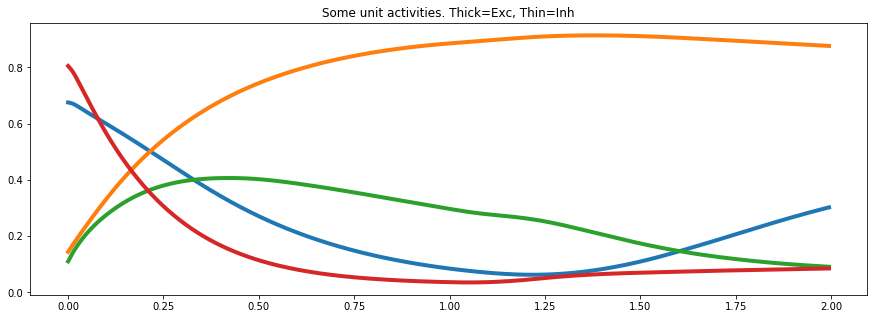

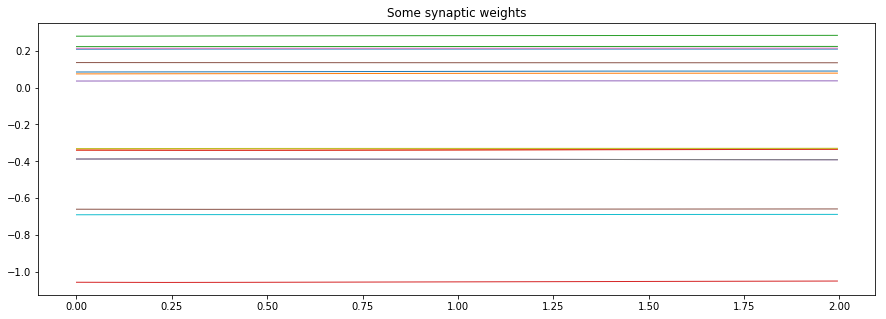

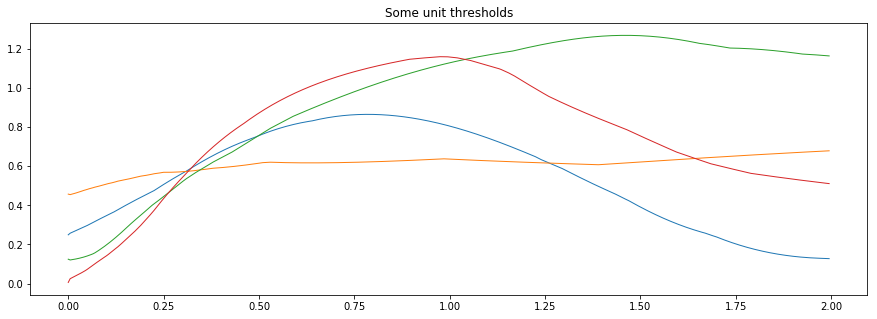

In [10]:
%matplotlib inline
net.basic_plot('L')

In [ ]:
%matplotlib inline
net.basic_plot('LI3')

In [ ]:
#net.double_anim(L.e+I1.x+I2.x, slider=False, interv=20, nbins=20, thr=0.7, pdf=True)
net.double_anim(L.e+I1.x+I2.x+I3.x+LI3.e, slider=True, interv=20, nbins=20, thr=0.7, pdf=True)

In [ ]:
# Remove the I3x_LI3e,i inputs
## put all the synapses in a list
I3_LI3_syns = []
for idx in LI3.e+LI3.i:
    I3_LI3_syns += [syn for syn in net.net.syns[idx] if syn.preID in I3.x]

## Set all weights in the list to zero
for syn in I3_LI3_syns:
    syn.w = 0.
    syn.lrate = 0.

In [ ]:
# Simulate again
n_pres = 20
pres_time = 1.
net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

In [ ]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 8  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = net.all_activs[top_pop[top_units]].transpose()
plt.plot(net.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 6  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(net.all_times, bottom_acts)
plt.show()

In [ ]:
# Visualize the connections
#net.conn_anim(I1.x+I2.x+LI3.e, L.e, slider=True)
#net.conn_anim(L.e, L.e, slider=True)
#net.conn_anim(I3.x, LI3.e, slider=True)
#net.conn_anim(I1.x+I2.x+I3.x, L.e+LI3.e, slider=True)
net.conn_anim(L.e, LI3.e, slider=True)

## Fourth part
Temporary test bed for delta units and synapses based on part 1.
In here all the units in L are replaced for a single delta unit

In [1]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

/home/z/projects/draculab


In [2]:
# This is the name of the file where logging will happen
log_file = "./logs/step1p2" + time.strftime("_%m-%d-%y.txt")

In [3]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [4]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [2]:
# create the network using the ei_network tools
layers = ['L','I1', 'I2', 'I3', 'LI3', 'D', 'upd', 'des']  
# L is the representatioan layer, I1,2,3 are the source layers, LI3 is the bidirectionally connected input layer,
# D is the delta unit, upd signals plasticity updates to D, des is the desired output of D.
net = ei_network(layers)

In [3]:
# Configure layer parameters

net.annotate('Configuration for sig in L.e')
L = net.layers['L']
I1 = net.layers['I1']
I2 = net.layers['I2']
I3 = net.layers['I3']
LI3 = net.layers['LI3']
D = net.layers['D']
upd = net.layers['upd']
des = net.layers['des']
#----------------------------------
L.annotate("Configuration of units in layer L.")
L.set_param('e_pars', 'type', unit_types.sigmoidal)
L.set_param('e_pars', 'slope_min', 1.7)
L.set_param('e_pars', 'slope_wid', .5)
L.set_param('e_pars', 'thresh_min', 0.)
L.set_param('e_pars', 'thresh_wid', 0.5)
L.set_param('e_pars', 'tau_min', 0.1)
L.set_param('e_pars', 'tau_wid', 0.3)
L.set_param('e_pars', 'n_ports', 1)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.3, 0.7], 'slopes' : 3, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 3.)
L.set_param('e_pars', 'tau_scale', .008)
L.set_param('e_pars', 'tau_relax', 10.)
L.set_param('e_pars', 'Kp', .02)
L.set_param('e_pars', 'tau_thr', .01)
L.set_param('e_pars', 'rdc_port', 0)
L.set_param('e_pars', 'hr_port', 0)
L.set_param('e_pars', 'thr_fix', 0.1)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 2)
#----------------------------------
L.annotate("Adjusting size of e,i groups, and connection weights.")
L.set_param('e_geom', 'rows', 10)
L.set_param('e_geom', 'columns', 10)
L.set_param('i_geom', 'rows', 5)
L.set_param('i_geom', 'columns', 5)
L.set_param('e_geom', 'jitter', 0.)
L.set_param('i_geom', 'jitter', 0.)
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.2}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.2}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -.2}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
L.annotate("Setting local inputs for L")
L.set_param('x_geom', 'rows', 0) # one or zero inputs in L, depending on sharpening
L.set_param('x_geom', 'columns', 1)
L.set_param('xe_conn', 'mask', {'circular': {'radius': 100.}}) # projecting to all L.e units
L.set_param('xe_conn', 'kernel', 1.)
L.set_param('xe_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
L.set_param('xe_syn', 'inp_ports', L.e_pars['sharpen_port'])
L.set_param('x_pars', 'tau_fast', 0.05)
#-----------------------------------
# specifying local input ports
L.set_param('ee_syn', 'inp_ports', 0)
L.set_param('ie_syn', 'inp_ports', 1)
#----------------------------------
L.annotate("Using static input synapses")
L.set_param('xe_syn', 'type', synapse_types.static)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.static)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using sq_hebbsnorm EE synapses")
L.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
L.set_param('ee_syn', 'lrate', 1./100.)
L.set_param('ee_syn', 'omega', 1.5)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./40.)
L.set_param('ie_syn', 'des_act', 0.4)
#----------------------------------
L.annotate("Using static EI synapses")
L.set_param('ei_syn', 'type', synapse_types.static)
#----------------------------------
I1.annotate("Configuration of I1 geometry")
I1.set_param('e_geom', 'rows', 0)
I1.set_param('i_geom', 'rows', 0)
I1.set_param('x_geom', 'rows', 10)
I1.set_param('x_geom', 'columns', 1)
I1.set_param('x_geom', 'extent', [.5, 1.])
I1.set_param('x_geom', 'center', [-.7, 0.])
#----------------------------------
I2.annotate("Configuration of I2 geometry")
I2.set_param('e_geom', 'rows', 0)
I2.set_param('i_geom', 'rows', 0)
I2.set_param('x_geom', 'rows', 1)
I2.set_param('x_geom', 'columns', 10)
I2.set_param('x_geom', 'extent', [1., .5])
I2.set_param('x_geom', 'center', [0., .7])
#----------------------------------
I3.annotate("Configuration of I3 geometry")
I3.set_param('e_geom', 'rows', 0)
I3.set_param('i_geom', 'rows', 0)
I3.set_param('x_geom', 'rows', 1)
I3.set_param('x_geom', 'columns', 10)
I3.set_param('x_geom', 'extent', [1., .5])
I3.set_param('x_geom', 'center', [0., -1.2])
#----------------------------------
L.set_param('n', 'w_track', 16)
LI3.set_param('n', 'w_track', 8)
I1.set_param('n', 'w_track', 0)
I2.set_param('n', 'w_track', 0)
I3.set_param('n', 'w_track', 0)
#----------------------------------

In [4]:
# Layer LI3 parameters
#----------------------------------
LI3.annotate("Configuration of units in layer LI3.")
LI3.set_param('e_pars', 'type', unit_types.sig_trdc)
LI3.set_param('e_pars', 'slope_min', 1.9)
LI3.set_param('e_pars', 'slope_wid', .2)
LI3.set_param('e_pars', 'thresh_min', 0.2)
LI3.set_param('e_pars', 'thresh_wid', 0.5)
LI3.set_param('e_pars', 'tau_min', 0.1)
LI3.set_param('e_pars', 'tau_wid', 0.3)
LI3.set_param('e_pars', 'n_ports', 2)
LI3.set_param('e_pars', 'branch_params', {'branch_w' : [0.3, 0.7], 'slopes' : 3, 'threshs' : 0.1})
LI3.set_param('e_pars', 'tau_slow', 10.)
LI3.set_param('e_pars', 'tau_fast', 0.05)
LI3.set_param('e_pars', 'c', 3.)
LI3.set_param('e_pars', 'tau_scale', .05)
LI3.set_param('e_pars', 'tau_relax', 10.)
LI3.set_param('e_pars', 'Kp', .02)
LI3.set_param('e_pars', 'tau_thr', .01)
LI3.set_param('e_pars', 'rdc_port', 0)
LI3.set_param('e_pars', 'hr_port', 0)
LI3.set_param('e_pars', 'thr_fix', 0.1)
LI3.set_param('e_pars', 'tau_fix', 0.1)
LI3.set_param('e_pars', 'sharpen_port', 2)
LI3.set_param('i_pars', 'thresh_min', 0.)
#----------------------------------
LI3.annotate("Adjusting e,i groups, and configuring EI,IE connections")
LI3.set_param('e_geom', 'rows', 6)
LI3.set_param('e_geom', 'columns', 10)
LI3.set_param('i_geom', 'rows', 3)
LI3.set_param('i_geom', 'columns', 5)
LI3.set_param('e_geom', 'jitter', 0.)
LI3.set_param('i_geom', 'jitter', 0.)
LI3.set_param('e_geom', 'extent', [1., .5])
LI3.set_param('e_geom', 'center', [0., -.8])
LI3.set_param('i_geom', 'extent', [1., .5])
LI3.set_param('i_geom', 'center', [0., -.8])
LI3.set_param('x_geom', 'extent', [1., .5])
LI3.set_param('x_geom', 'center', [0., -.8])

LI3.set_param('ee_conn', 'mask', {'circular' : {'radius': 3.}})
LI3.set_param('ee_conn', 'kernel', {'gaussian' : {'p_center' : 1.1, 'sigma' : .5}})
LI3.set_param('ee_conn', 'allow_autapses', True)
LI3.set_param('ee_conn', 'weights', {'gaussian' : {'w_center' : .3, 'sigma' : .2}})

LI3.set_param('ei_conn', 'mask', {'annular' : {'inner_radius': .2, 'outer_radius' : 0.5}})
LI3.set_param('ei_conn', 'kernel', 1.)
LI3.set_param('ei_conn', 'weights',{'ring_gaussian' : {'w_center' : .4, 'sigma' : .1, 'radius' : .3}})

LI3.set_param('ie_conn', 'mask', {'circular' : {'radius': .5}})
LI3.set_param('ie_conn', 'kernel', {'gaussian' : {'p_center' : 1., 'sigma' : 1.}})
LI3.set_param('ie_conn', 'allow_autapses', True)
LI3.set_param('ie_conn', 'weights', {'gaussian' : {'w_center' : -2., 'sigma' : .2}})
LI3.set_param('ie_syn', 'inp_ports', 0)

LI3.set_param('ii_conn', 'weights',{'uniform' : {'low': -.6, 'high' : -0.2}})
#----------------------------------
LI3.annotate("Setting LI3.x configuration")
LI3.set_param('x_geom', 'rows', 0) # one or zero inputs in L, depending on sharpening
LI3.set_param('x_geom', 'columns', 1)
LI3.set_param('xe_conn', 'mask', {'circular': {'radius': 100.}}) # projecting to all LI3.e units
LI3.set_param('xe_conn', 'kernel', 1.)
LI3.set_param('xe_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
LI3.set_param('xe_syn', 'inp_ports', L.e_pars['sharpen_port'])
#-----------------------------------
# specifying local input ports
LI3.set_param('ee_syn', 'inp_ports', 0)
LI3.set_param('ie_syn', 'inp_ports', 1)
#----------------------------------
LI3.annotate("Using static input synapses")
LI3.set_param('xe_syn', 'type', synapse_types.static)
LI3.set_param('xi_syn', 'type', synapse_types.static)
#----------------------------------
LI3.annotate("Using sq_hebbsnorm EE synapses")
LI3.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
LI3.set_param('ee_syn', 'lrate', 1./100.)
LI3.set_param('ee_syn', 'omega', 1.5)
#----------------------------------
#LI3.annotate("Using static IE synapses")
#LI3.set_param('ie_syn', 'type', synapse_types.static)
LI3.annotate("Using corr_homeo_inhib IE synapses")
LI3.set_param('ie_syn', 'type', synapse_types.corr_inh)
LI3.set_param('ie_syn', 'lrate', 1./20.)
LI3.set_param('ie_syn', 'des_act', 0.3)
#----------------------------------
LI3.annotate("Using anticov EI synapses")
LI3.set_param('ei_syn', 'type', synapse_types.anticov)
LI3.set_param('ei_syn', 'lrate', 1./500.)

In [5]:
# Delta unit parameters
#----------------------------------
D.set_param('e_pars', 'type', unit_types.delta_linear)
D.set_param('e_pars', 'n_ports', 3)
D.set_param('e_pars', 'tau_slow', 10.)
D.set_param('e_pars', 'tau_fast', 0.02)
D.set_param('e_pars', 'gain', 1.)
D.set_param('e_pars', 'tau_e', .7) # gives roughly 0.5 seconds
D.set_param('e_pars', 'bias_lrate', .0001)
#----------------------------------
D.annotate("Adjusting size of e,i groups.")
D.set_param('e_geom', 'rows', 1)
D.set_param('e_geom', 'columns', 1)
D.set_param('i_geom', 'rows', 0)
D.set_param('ee_conn', 'weights',{'uniform' : {'low': 0., 'high' : 0.}})
D.set_param('ee_conn', 'allow_autapses', False)
#----------------------------------
D.annotate("Setting input parameters")
D.set_param('x_geom', 'rows', 0) 
D.set_param('x_geom', 'columns', 0) 
#----------------------------------
upd.annotate("Leaving a single input unit in the upd layer")
upd.set_param('e_geom', 'rows', 0)
upd.set_param('i_geom', 'rows', 0)
upd.set_param('x_geom', 'rows', 1)
upd.set_param('x_geom', 'columns', 1)
#----------------------------------
upd.annotate("Configuring upd unit")
upd.set_param('x_pars', 'function', lambda x : None)
upd.set_param('x_pars', 'init_val', 1.)
upd.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
des.annotate("Leaving a single input unit in the des layer")
des.set_param('e_geom', 'rows', 0)
des.set_param('i_geom', 'rows', 0)
des.set_param('x_geom', 'rows', 1)
des.set_param('x_geom', 'columns', 1)
#----------------------------------
des.annotate("Configuring des unit")
des.set_param('x_pars', 'function', lambda x : None)
des.set_param('x_pars', 'init_val', 1.)
des.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
D.set_param('n', 'w_track', 0)
upd.set_param('n', 'w_track', 0)
des.set_param('n', 'w_track', 0)
#----------------------------------

In [6]:
# Add interlayer connections
net.add_connection(('I1','x'), ('L','e'))
net.add_connection(('I1','x'), ('L','i'))
net.add_connection(('I2','x'), ('L','e'))
net.add_connection(('I2','x'), ('L','i'))
net.add_connection(('I3','x'), ('LI3','e'))
net.add_connection(('I3','x'), ('LI3','i'))
net.add_connection(('LI3','e'), ('L','e'))
net.add_connection(('LI3','e'), ('L','i'))
net.add_connection(('L','e'), ('LI3','e'))
net.add_connection(('L','e'), ('LI3','i'))
net.add_connection(('L','e'), ('D', 'e'))
net.add_connection(('upd','x'), ('D','e'))
net.add_connection(('des','x'), ('D','e'))

In [7]:
# Configure interlayer connections

net.set_param('I1x_Le_conn', 'connection_type', 'convergent')
net.set_param('I1x_Le_conn', 'number_of_connections', 2)
net.set_param('I1x_Le_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I1x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I1x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
net.set_param('I1x_Le_conn', 'dist_dim', 'y')
net.set_param('I1x_Le_conn', 'edge_wrap', True)
net.set_param('I1x_Le_syn', 'inp_ports', 1)
net.set_param('I1x_Le_syn', 'type', synapse_types.bcm)
net.set_param('I1x_Le_syn', 'lrate', 1./50.)
net.set_param('I1x_Le_syn', 'omega', 1.5)

net.set_param('I1x_Li_conn', 'connection_type', 'convergent')
net.set_param('I1x_Li_conn', 'number_of_connections', 2)
net.set_param('I1x_Li_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I1x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I1x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
net.set_param('I1x_Li_conn', 'dist_dim', 'y')
net.set_param('I1x_Li_conn', 'edge_wrap', True)

net.set_param('I2x_Le_conn', 'connection_type', 'convergent')
net.set_param('I2x_Le_conn', 'number_of_connections', 2)
net.set_param('I2x_Le_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I2x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I2x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
net.set_param('I2x_Le_conn', 'dist_dim', 'x')
net.set_param('I2x_Le_conn', 'edge_wrap', True)
net.set_param('I2x_Le_syn', 'inp_ports', 1)
net.set_param('I2x_Le_syn', 'type', synapse_types.bcm)
net.set_param('I2x_Le_syn', 'lrate', 1./50.)
net.set_param('I2x_Le_syn', 'omega', 1.5)

net.set_param('I2x_Li_conn', 'connection_type', 'convergent')
net.set_param('I2x_Li_conn', 'number_of_connections', 2)
net.set_param('I2x_Li_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('I2x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('I2x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
net.set_param('I2x_Li_conn', 'dist_dim', 'x')
net.set_param('I2x_Li_conn', 'edge_wrap', True)

net.set_param('I3x_LI3e_conn', 'mask', {'circular': {'radius': .2}})
net.set_param('I3x_LI3e_conn', 'kernel', 1.)
net.set_param('I3x_LI3e_conn', 'weights', {'gaussian' : {'w_center' : 1.5, 'sigma' : .1}})
net.set_param('I3x_LI3e_conn', 'dist_dim', 'x')
net.set_param('I3x_LI3e_conn', 'edge_wrap', True)
net.set_param('I3x_LI3e_syn', 'inp_ports', 1)
net.set_param('I3x_LI3e_syn', 'type', synapse_types.static)

net.set_param('I3x_LI3i_conn', 'mask', {'annular' : {'inner_radius': .1, 'outer_radius' : 0.4}})
net.set_param('I3x_LI3i_conn', 'kernel', 1.)
net.set_param('I3x_LI3i_conn', 'weights', {'ring_gaussian' : {'w_center' : .4, 'sigma' : .2, 'radius' : .2}})
net.set_param('I3x_LI3i_conn', 'dist_dim', 'x')
net.set_param('I3x_LI3i_conn', 'edge_wrap', True)

net.set_param('LI3e_Le_conn', 'connection_type', 'convergent')
net.set_param('LI3e_Le_conn', 'number_of_connections', 5)
net.set_param('LI3e_Le_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('LI3e_Le_conn', 'kernel', .4)
net.set_param('LI3e_Le_conn', 'weights', {'uniform' : {'low' : 0.1, 'high' : .6}})
net.set_param('LI3e_Le_conn', 'edge_wrap', True)
net.set_param('LI3e_Le_syn', 'inp_ports', 1)
net.set_param('LI3e_Le_syn', 'type', synapse_types.bcm)
net.set_param('LI3e_Le_syn', 'lrate', 1./50.)
net.set_param('LI3e_Le_syn', 'omega', 1.5)

net.set_param('LI3e_Li_conn', 'connection_type', 'convergent')
net.set_param('LI3e_Li_conn', 'number_of_connections', 5)
net.set_param('LI3e_Li_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('LI3e_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
net.set_param('LI3e_Li_conn', 'weights', {'uniform' : {'low' : 0.1, 'high' : .4}})
net.set_param('LI3e_Li_conn', 'dist_dim', 'x')
net.set_param('LI3e_Li_conn', 'edge_wrap', True)

def make_L_to_LI3_transf(L_geom, LI3_geom):
    L_cntr = np.array(L_geom['center'])
    LI3_cntr = np.array(LI3_geom['center'])
    L_extent = L_geom['extent']
    LI3_extent = LI3_geom['extent']
    shift = LI3_cntr - L_cntr
    x_scaling = LI3_extent[0] / L_extent[0]
    y_scaling = LI3_extent[1] / L_extent[1]
    return lambda x : np.array([x_scaling * x[0], y_scaling * x[1]]) + shift

net.set_param('Le_LI3e_conn', 'connection_type', 'convergent')
#net.set_param('Le_LI3e_conn', 'number_of_connections', 20)
net.set_param('Le_LI3e_conn', 'mask', {'circular': {'radius': .5}})
net.set_param('Le_LI3e_conn', 'kernel', {'gaussian' : {'p_center' : 1., 'sigma' : .2}})
net.set_param('Le_LI3e_conn', 'weights', {'linear' : {'c' : 0.1, 'a' : .2}})
net.set_param('Le_LI3e_conn', 'edge_wrap', True)
net.set_param('Le_LI3e_conn', 'boundary', {'center':LI3.e_geom['center'], 'extent':LI3.e_geom['extent']})
net.set_param('Le_LI3e_conn', 'transform', make_L_to_LI3_transf(L.e_geom, LI3.e_geom))
net.set_param('Le_LI3e_syn', 'inp_ports', 1)
net.set_param('Le_LI3e_syn', 'type', synapse_types.sq_hebbsnorm)
net.set_param('Le_LI3e_syn', 'lrate', 1./50.)
net.set_param('Le_LI3e_syn', 'omega', 1.) # for sq_hebbsnorm

net.set_param('Le_LI3i_conn', 'connection_type', 'convergent')
#net.set_param('Le_LI3i_conn', 'number_of_connections', 3)
net.set_param('Le_LI3i_conn', 'mask', {'circular': {'radius': .5}})
net.set_param('Le_LI3i_conn', 'kernel', {'gaussian' : {'p_center' : 1., 'sigma' : .2}})
net.set_param('Le_LI3i_conn', 'weights', {'linear' : {'c' : 0.1, 'a' : .2}})
net.set_param('Le_LI3i_conn', 'edge_wrap', True)
net.set_param('Le_LI3i_conn', 'boundary', {'center':LI3.i_geom['center'], 'extent':LI3.i_geom['extent']})
net.set_param('Le_LI3i_conn', 'transform', make_L_to_LI3_transf(L.e_geom, LI3.i_geom))
net.set_param('Le_LI3i_syn', 'type', synapse_types.sq_hebbsnorm)
net.set_param('Le_LI3i_syn', 'lrate', 1./50.)
net.set_param('Le_LI3i_syn', 'omega', 1.) # for sq_hebbsnorm

net.set_param('Le_De_conn', 'connection_type', 'divergent')
net.set_param('Le_De_conn', 'mask', {'circular': {'radius': 5.}})
net.set_param('Le_De_conn', 'kernel', 1.)
net.set_param('Le_De_conn', 'weights', {'uniform' : {'low' : 0.01, 'high' : .05}})
net.set_param('Le_De_syn', 'inp_ports', 0)
net.set_param('Le_De_syn', 'type', synapse_types.delta)
net.set_param('Le_De_syn', 'lrate', .2)

net.set_param('updx_De_conn', 'mask',{'circular': {'radius': 10.}})
net.set_param('updx_De_conn', 'kernel', 1.)
net.set_param('updx_De_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
net.set_param('updx_De_syn', 'inp_ports', 2)

net.set_param('desx_De_conn', 'mask',{'circular': {'radius': 10.}})
net.set_param('desx_De_conn', 'kernel', 1.)
net.set_param('desx_De_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
net.set_param('desx_De_syn', 'inp_ports', 1)

In [8]:
# Build the network
net.build()

Building layer L
Building layer upd
Building layer LI3


/home/z/projects/draculab/topology.py:286: UserWarning: topo_connect received an empty list as an argument
  warn('topo_connect received an empty list as an argument', UserWarning)


Building layer des
Building layer I3
Building layer D
Building layer I1
Building layer I2


Creating I1x_Le connection
Creating I1x_Li connection
Creating I2x_Le connection


/home/z/projects/draculab/topology.py:427: UserWarning: Zero connections created with topo_connect
  warn('Zero connections created with topo_connect', UserWarning)


Creating I2x_Li connection
Creating I3x_LI3e connection
Creating I3x_LI3i connection
Creating LI3e_Le connection
Creating LI3e_Li connection
Creating Le_LI3e connection
Creating Le_LI3i connection
Creating Le_De connection
Creating updx_De connection
Creating desx_De connection


In [9]:
#================ INPUT CONFIGURATION =================
n_pat1 = I1.n['x']  # number of input patterns for I1 is number of input units
n_pat2 = I2.n['x']  # number of input patterns for I2 is number of input units
n_pat3 = I3.n['x']  # number of input patterns for I3 is number of input units
pats1 = [] # here we'll store id's for the patterns presented by inp_pat1
pats2 = [] # here we'll store id's for the patterns presented by inp_pat2
pats3 = [] # here we'll store id's for the patterns presented by inp_pat3
n_inp = n_pat1*n_pat2
"""
i_nums = np.random.permutation(n_inp)
idx_list1 = [int(np.floor(n/n_pat2)) for n in i_nums]  
idx_list2 = [int(round(n%n_pat2)) for n in i_nums]
"""
input_list = [] # will contain 3-tuples with all the input indexes (I1x,I2x,I3x)
for p1 in range(n_pat1):
    for p2 in range(n_pat2):
        input_list.append( (p1, p2, (p1+p2)%n_pat2) )
np.random.shuffle(input_list)

def inp_pat1(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I1
    mpres = pres%n_inp
    if random:  # inp_pat1 is tasked with shuffling the inuts when we start a new round
        if mpres == 0:
            np.random.shuffle(input_list)
        idx = input_list[mpres][0]
    else:
        idx = int(np.floor(mpres/n_pat2))
    pats1.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat1)) for x in range(n_pat1)]

def inp_pat2(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I2
    if random:
        idx = input_list[pres%n_inp][1]
    else:
        idx = int(round(pres%n_pat2))
    pats2.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat2)) for x in range(n_pat2)]

def inp_pat3(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I3
    idx = input_list[pres%n_inp][2]
    pats3.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat3)) for x in range(n_pat3)]
    
## The pattern of L.x is irrelevant, we set it using set_inp_fun instead of set_inp_pat
L_inp_pat = lambda p, r, c : 1.
LI3_inp_pat = lambda p, r, c : 1.

def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

## The pattern of upd.x is also irrelevant
upd_inp_pat = lambda p, r, c : 1.

def make_upd_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .5 # update is started eps units before the next input
    return lambda t : 1. if (t > init_time+pres_time-eps and t < init_time+pres_time-eps/2.) else 0.
    #return lambda t: 1.  # constantly updating unit

def set_upd_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_upd_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )
            
def des_pat(pres, rows, columns):
    # The function that creates the desired input pattern. Currently follows inp_pat3
    return [0.1 * input_list[pres%n_inp][2]]
    

inp_pat_dic = {'I1' : inp_pat1, 'I2' : inp_pat2, 'I3' : inp_pat3, 'L' : L_inp_pat, 'LI3' : LI3_inp_pat, 'upd' : upd_inp_pat, 'des' : des_pat }
inp_fun_dic = {'L' : set_shrp_fun, 'LI3' : set_shrp_fun, 'upd' : set_upd_fun }
#======================================================


In [10]:
# Simulating
n_pres = 8
pres_time = 1.
net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

Starting presentation 0
Presentation 0 took 24.208290100097656 seconds 
Starting presentation 1
Presentation 1 took 23.986992120742798 seconds 
Starting presentation 2
Presentation 2 took 23.624399423599243 seconds 
Starting presentation 3
Presentation 3 took 23.777485132217407 seconds 
Starting presentation 4
Presentation 4 took 23.637934684753418 seconds 
Starting presentation 5
Presentation 5 took 23.883171796798706 seconds 
Starting presentation 6
Presentation 6 took 23.81711483001709 seconds 
Starting presentation 7
Presentation 7 took 24.51584267616272 seconds 
Total execution time is 191.4557147026062 seconds 
----------------------


norm of output matrix: 53.333237
norm of input matrix: 68.718427
norm of difference between matrices: 46.470883


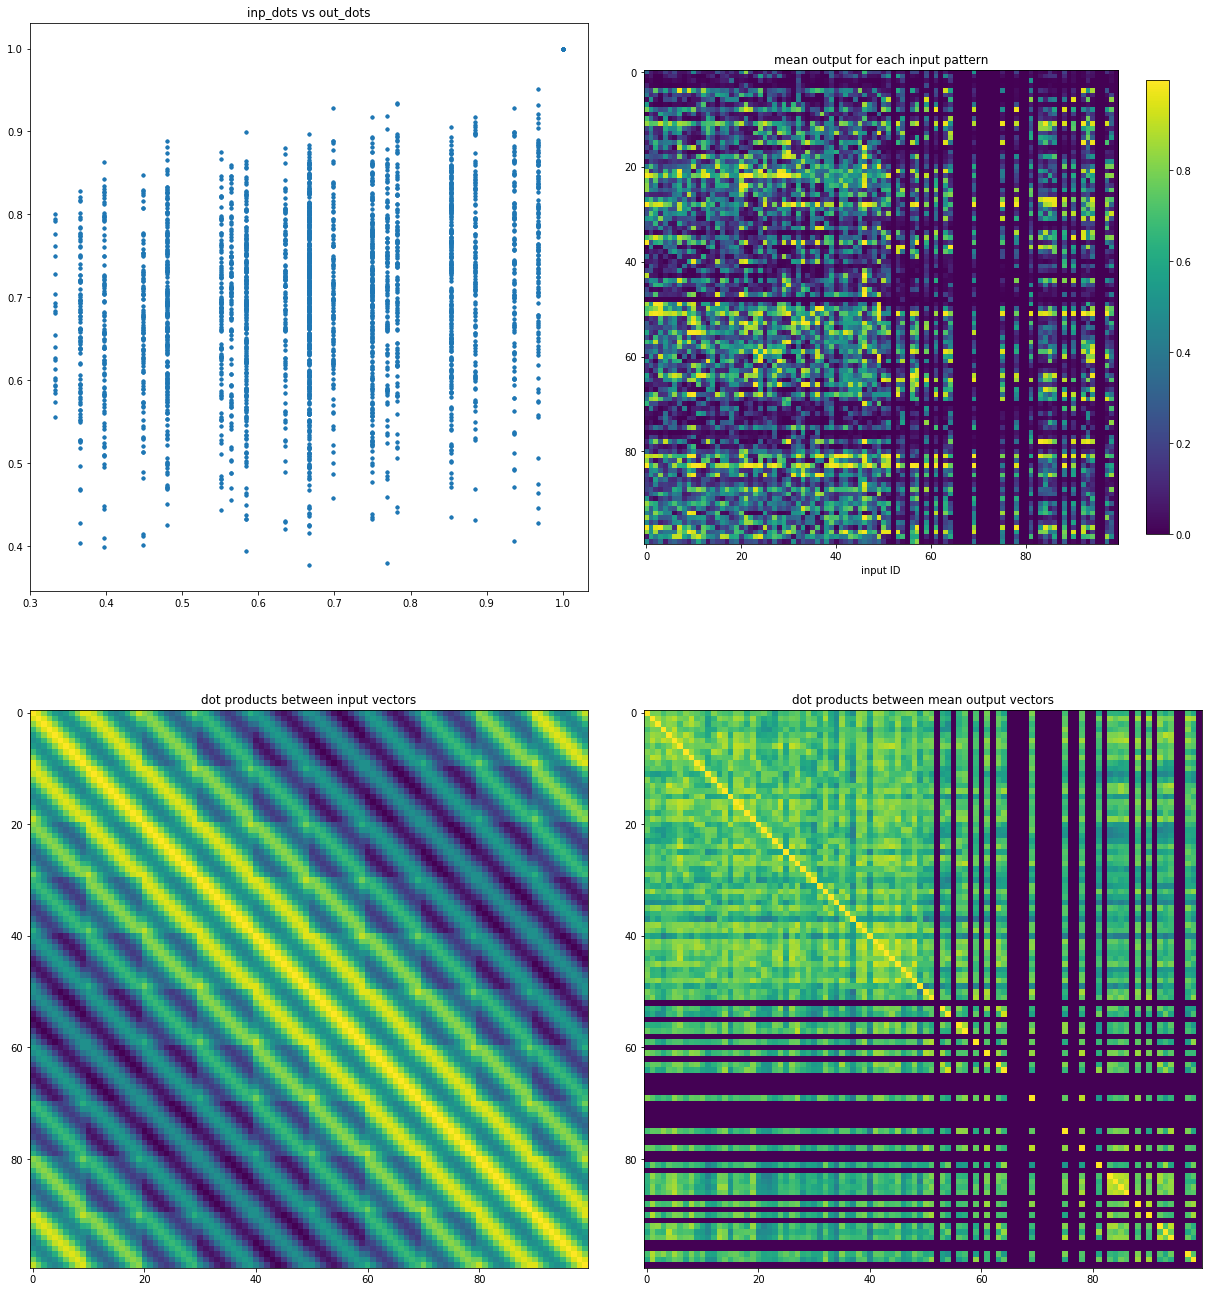

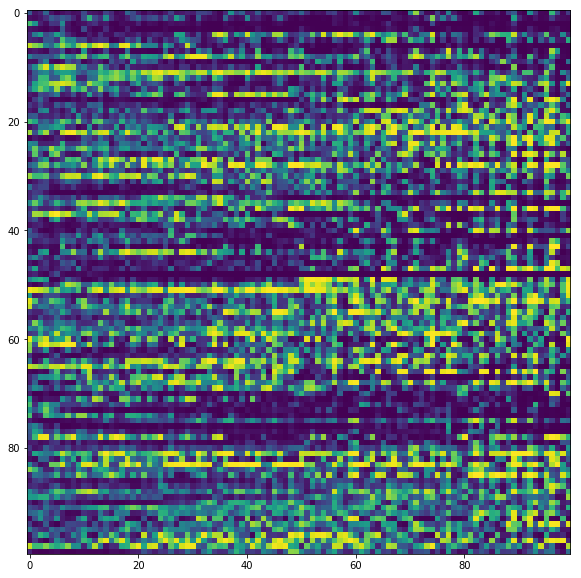

In [22]:
# Simulation analysis

## For each input presentation obtain the activity vector from layer L (e_pats)
ppat = int(round(pres_time/net.net_params['min_delay'])) # number of data points per input pattern
pt = int(round((pres_time-0.2)/net.net_params['min_delay'])) # data point where the vector will come from
e_pats = np.zeros((len(L.e), n_pres))  # array where we'll store the activity vectors
for pres in range(n_pres):
    for e_idx, idx in enumerate(L.e):
        e_pats[e_idx, pres] = net.all_activs[idx, pres*ppat + pt]

## Obtain the ID of the pattern that appeared at each input presentation (pres_pat)
# The ID of the input comes from the id's in pats1 and pats2, placed by inp_pat1 and inp_pat2 respectively.
pater1 = pats1[1:] # The first call is just for setting initial conditions; we discard its pattern
pater2 = pats2[1:] # ditto
pats = np.zeros(n_pat1*n_pat2)  # pats[n] is the number of times the pattern with ID 'n' appeared
n_pats = len(pats)
pres_pat = np.zeros(n_pres)  # pres_pat[n] is the ID of the pattern in presentation 'n'
for p in range(n_pres):
    p_id = n_pat2*pater1[p] + pater2[p] # the pattern ID 'flattens' all possible pairs of values
    pats[p_id] += 1
    pres_pat[p] = p_id

## get the mean of output patterns corresponding to the same inputs (mean_out)
mean_out = np.zeros((len(L.e),n_pats)) # mean_out[:,n] = mean output for input n
for pres in range(n_pres):
    mean_out[:,int(pres_pat[pres])] += e_pats[:,pres]
for pat in range(n_pats):
    if pats[pat] > 1:
        mean_out[:, pat] = mean_out[:, pat]/ pats[pat]
        
## Obtain the dot products between any two pairs of input (inp_dots) or output (out_dots) patterns
# get all input patterns
all_inps = np.zeros((n_pats, n_pat1+n_pat2)) # all_inps[n,:] = input pattern with ID 'n'
for p1 in range(n_pat1):
    for p2 in range(n_pat2):
        idx = p1*n_pat2+p2
        all_inps[idx, :n_pat1] = inp_pat1(idx, 1, 1, random=False)
        all_inps[idx, n_pat1:] = inp_pat2(idx, 1, 1, random=False)     
# get matrices with dot products between pairs of patterns
inp_norm = np.linalg.norm(all_inps[0,:])   # all input vectors have the same norm
inp_norm2 = inp_norm*inp_norm
inp_dots = np.zeros((n_pats, n_pats))
out_dots = np.zeros((n_pats, n_pats))
for p1 in range(n_pats):
    for p2 in range(n_pats):
        inp_dots[p1,p2] = np.dot(all_inps[p1,:], all_inps[p2,:])/inp_norm2
        if pats[p1] > 0 and pats[p2] > 0: # if the two input patterns were presented
                #pres_idx1 = np.argmin(abs(pres_pat - p1))  # index of presentation where you showed pattern 1
                #pres_idx2 = np.argmin(abs(pres_pat - p2))  # index of presentation where you showed pattern 2
                #vec1 = e_pats[:,pres_idx1]  # first input vector
                #vec2 = e_pats[:,pres_idx2]  # second input vector
                vec1 = mean_out[:,p1]
                vec2 = mean_out[:,p2]
                norm1 = np.linalg.norm(vec1)
                norm2 = np.linalg.norm(vec2)
                out_dots[p1,p2] = np.dot(vec1,vec2)/(norm1*norm2)
                
# compare the angles between input patterns with the angles between output patterns
absissae = []
ordinates = []
for row in range(n_pats):
    for column in range(n_pats):
        if out_dots[row,column] > 0:
            absissae.append(inp_dots[row,column])
            ordinates.append(out_dots[row,column])
            
#plot the results of the analysis
%matplotlib inline
fig, axes = plt.subplots(2,2, figsize=(21, 23))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

im0 = axes[0,0].plot(absissae, ordinates, '.')
axes[0,0].set_title('inp_dots vs out_dots')
im1 = axes[0,1].imshow(mean_out)
axes[0,1].set_title('mean output for each input pattern')
axes[0,1].set_xlabel('input ID')
fig.colorbar(im1,ax=axes[0,1],fraction=0.1,shrink=0.8)
im2 = axes[1,0].imshow(inp_dots)
axes[1,0].set_title('dot products between input vectors')
im3 = axes[1,1].imshow(out_dots)
axes[1,1].set_title('dot products between mean output vectors')
#fig.colorbar(im3,fraction=0.1,shrink=0.8)

# plot the array of activity patterns
ex_fig = plt.figure(figsize=(20,10))
plt.imshow(e_pats)
    
# A numerical measure of how much the output representation differentiates the inputs may be the norm of (inp_dots - out_dots)
diff_norm = np.linalg.norm(inp_dots-out_dots) # will use Frobenius norm, as if they were vectors
print("norm of output matrix: %f" % (np.linalg.norm(out_dots)))
print("norm of input matrix: %f" % (np.linalg.norm(inp_dots)))
print("norm of difference between matrices: %f" % (diff_norm))

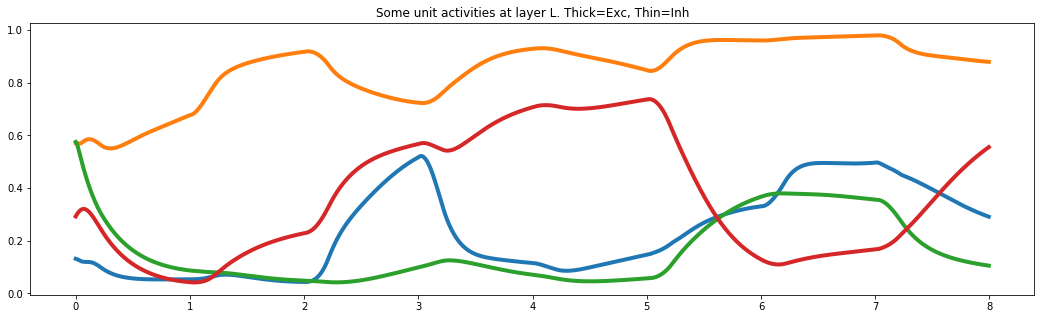

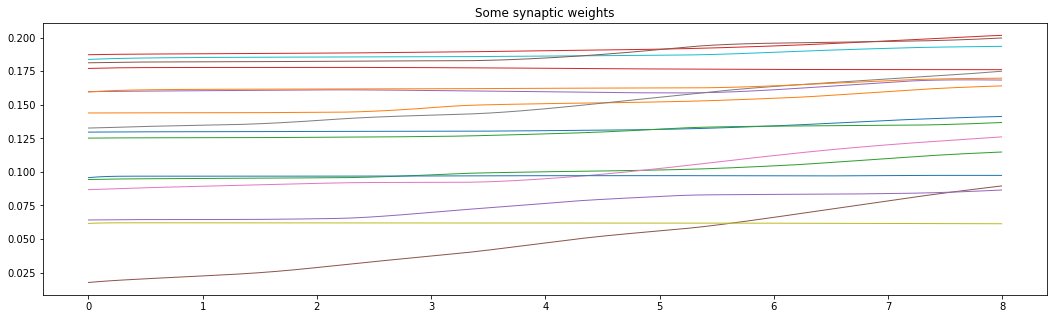

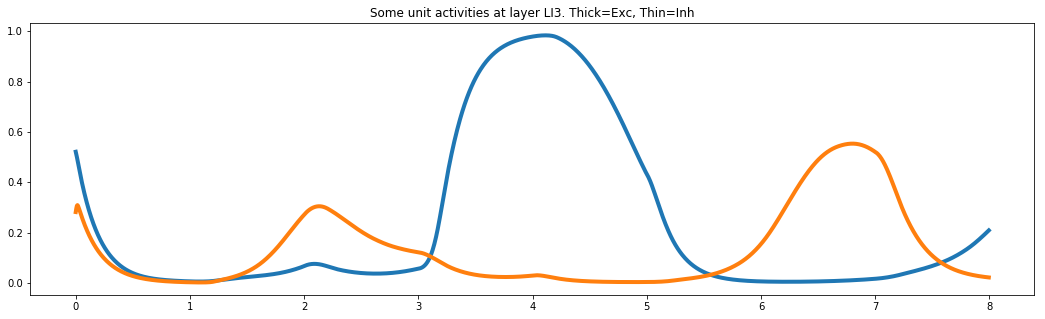

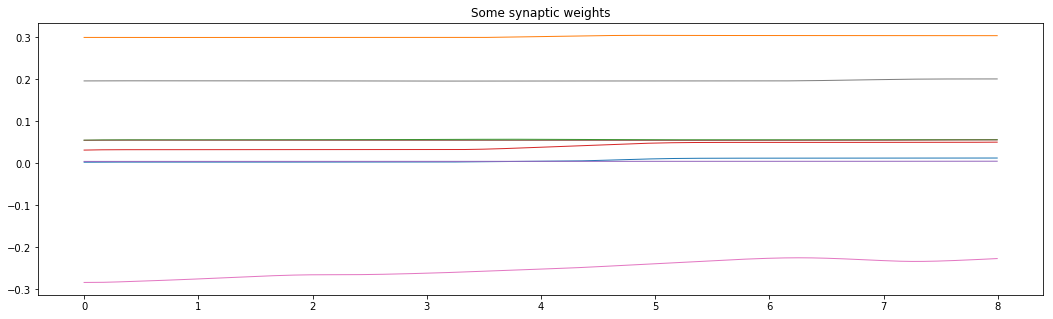

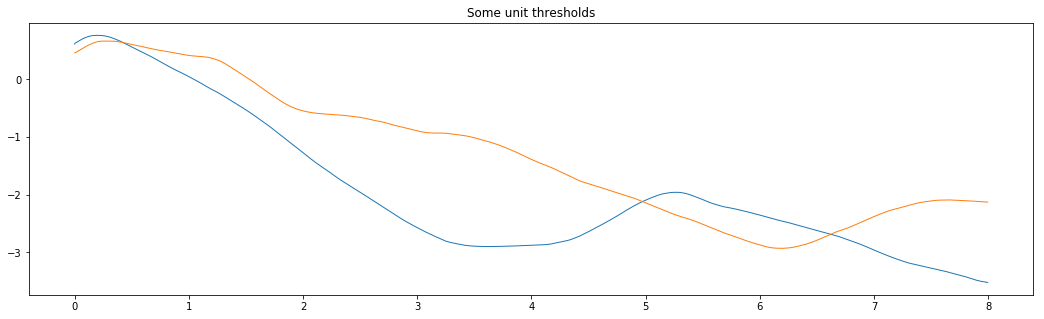

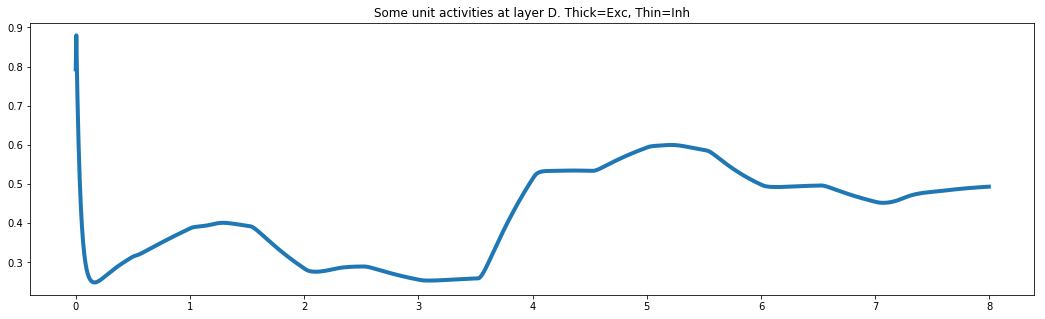

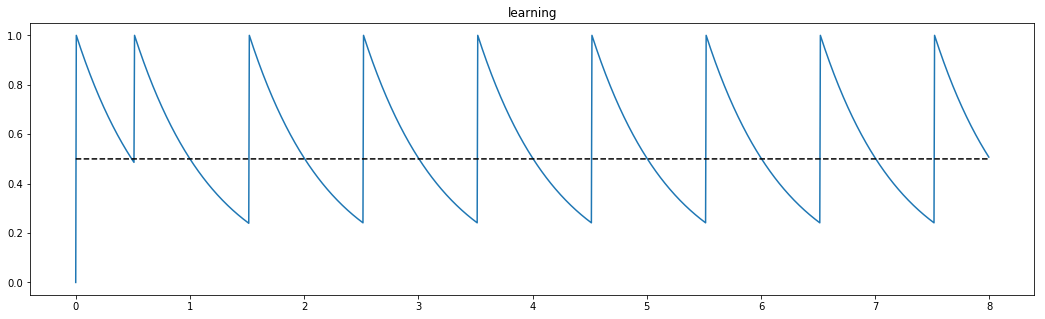

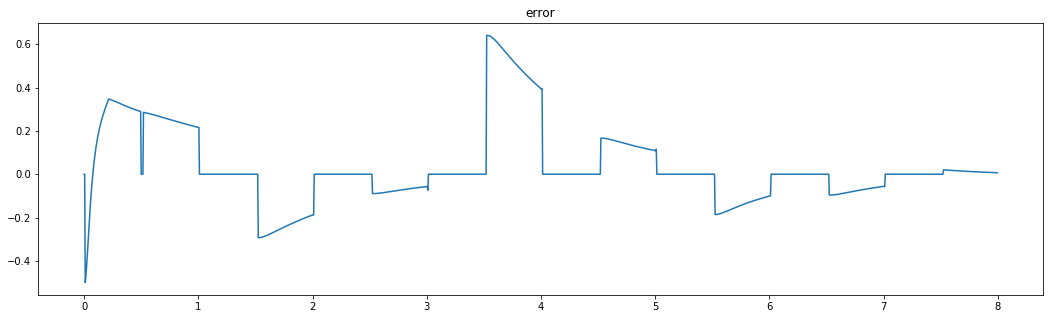

In [11]:
%matplotlib inline
net.basic_plot('L')
net.basic_plot('LI3')
net.basic_plot('D')
LI3 = net.layers['LI3']

[ 4  7 10 14 11  3  9 13  1  5  2]


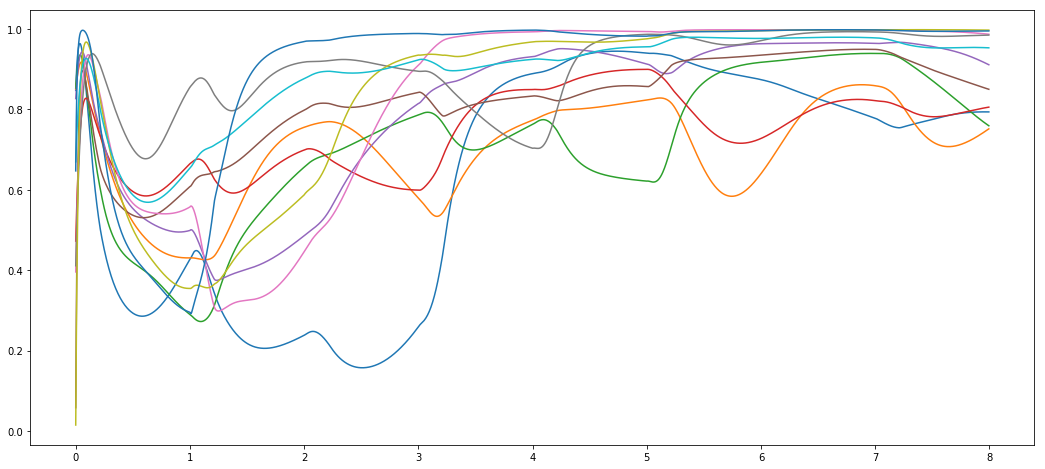

In [12]:
# Plot the lowest excitatory unit activities (LI3)
n_bottom = 12  # how many units to plot
bottom_pop = np.array(LI3.i)  # population to visualize
bottom_units = net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(net.all_times, bottom_acts)
plt.show()

In [14]:
#net.double_anim(LI3.e, slider=False, interv=10, nbins=20, thr=0.7, pdf=True)
net.double_anim(L.e+LI3.e+I1.x+I2.x+I3.x, slider=False, interv=10, nbins=20, thr=0.7, pdf=True)

In [17]:
# Visualize the connections
#net.conn_anim(I1.x+I2.x, L.e, slider=False)
net.conn_anim(LI3.i, LI3.i, slider=True)
#net.conn_anim(I3.x, LI3.e, slider=True)

interactive(children=(IntSlider(value=8, description='frame', max=15, min=1), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

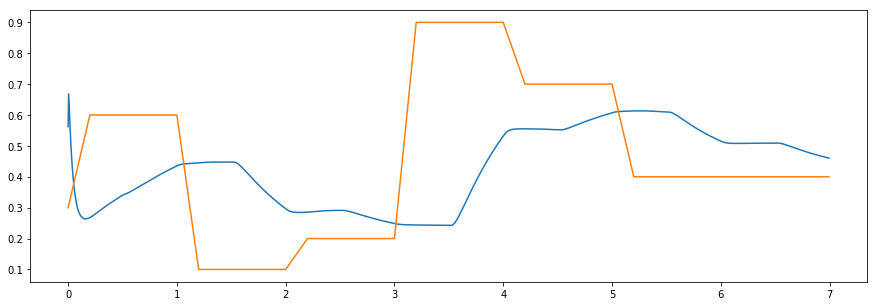

In [20]:
# compare actual and desired outputs
cmp_fig = plt.figure(figsize=(15,5))
#plt.plot(net.all_times[32000:], net.all_activs[D.e[0]][32000:], net.all_times[32000:], net.all_activs[des.x[0]][32000:])#
plt.plot(net.all_times, net.all_activs[D.e[0]], net.all_times, net.all_activs[des.x[0]])

In [9]:
# add tracking units for the learning and error variables
# DEPRECATED
trk_pars = {'type' : unit_types.source,  # parameters for "tracking" units
            'init_val' : 0.,
            'tau_fast' : 0.05,
            'function' : lambda x: None }
def create_lt(unit_id):
    return lambda t : net.net.units[unit_id].learning

def create_et(unit_id):
    return lambda t : net.net.units[unit_id].error

learn_trk = net.net.create(1, trk_pars)
error_trk = net.net.create(1, trk_pars)
net.net.units[learn_trk[0]].set_function(create_lt(D.e[0]))
net.net.units[error_trk[0]].set_function(create_et(D.e[0]))

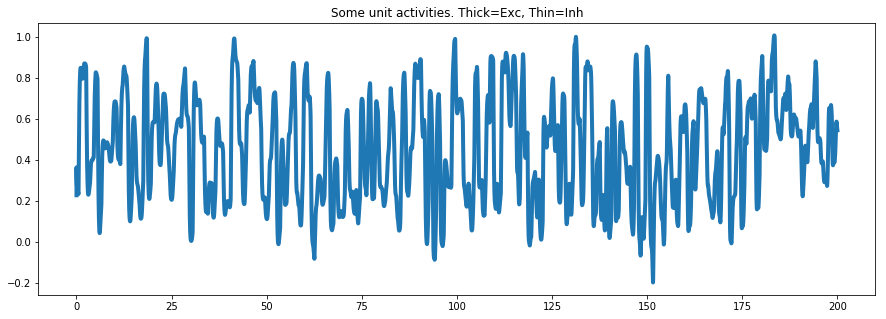

Text(0.5,1,'error')

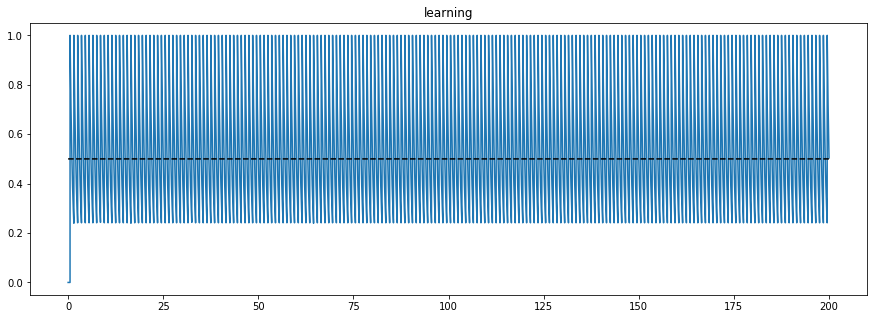

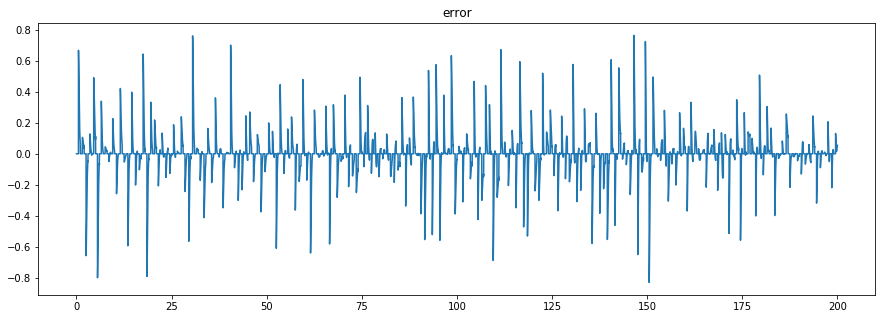

In [24]:
# DEPRECATED
%matplotlib inline
net.basic_plot('D')
# plot learning and error variables
tr_fig = plt.figure(figsize=(15,5))
plt.plot(net.all_times, net.all_activs[learn_trk[0]], net.all_times, np.tile(.5,len(net.all_times)), 'k--')
plt.title('learning')
err_fig = plt.figure(figsize=(15,5))
#plt.plot(net.all_times[32000:], net.all_activs[error_trk[0]][32000:])
plt.plot(net.all_times, net.all_activs[error_trk[0]])
plt.title('error')